## Загрузка данных

In [228]:
import pandas as pd
import numpy as np

In [229]:
akra = pd.read_csv('AKRA.csv')
akra.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,1,Повышение кредитного рейтинга Акционерного об...,A,A,АКРА
1,1,6,Кредитный рейтинг ПАО «ФосАгро» (далее — Комп...,AAA,AAA,АКРА
2,2,10,Кредитный рейтинг ООО «МВМ» (далее — Компани...,A,A,АКРА
3,3,15,Кредитный рейтинг Акционерного общества «Сина...,A,A,АКРА
4,4,16,Кредитный рейтинг ПАО «М.видео» (далее — Груп...,A,A,АКРА


In [230]:
# akra['text'][0]

In [231]:
# akra['text']

In [232]:
reyt = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B' ,'C']

all_reyt = []
adds = ['+', "", "-"]
for i in reyt:
    if i!='C' and i!='AAA':
        for j in adds:
            all_reyt.append(i+j)
    else:
        all_reyt.append(i)
reyt = reyt[:len(reyt)-1] # класса C нет
print(reyt)
category2label = {reyt[-i]: i-1 for i in range(len(reyt)+1)}
print(category2label, sep=" ")

['AAA', 'AA', 'A', 'BBB', 'BB', 'B']
{'AAA': 5, 'B': 0, 'BB': 1, 'BBB': 2, 'A': 3, 'AA': 4}


In [233]:
all_reyt_dict = {all_reyt[-i]: i-1 for i in range(len(all_reyt)+1)}
print(all_reyt_dict, sep=" ")

{'AAA': 16, 'C': 0, 'B-': 1, 'B': 2, 'B+': 3, 'BB-': 4, 'BB': 5, 'BB+': 6, 'BBB-': 7, 'BBB': 8, 'BBB+': 9, 'A-': 10, 'A': 11, 'A+': 12, 'AA-': 13, 'AA': 14, 'AA+': 15}


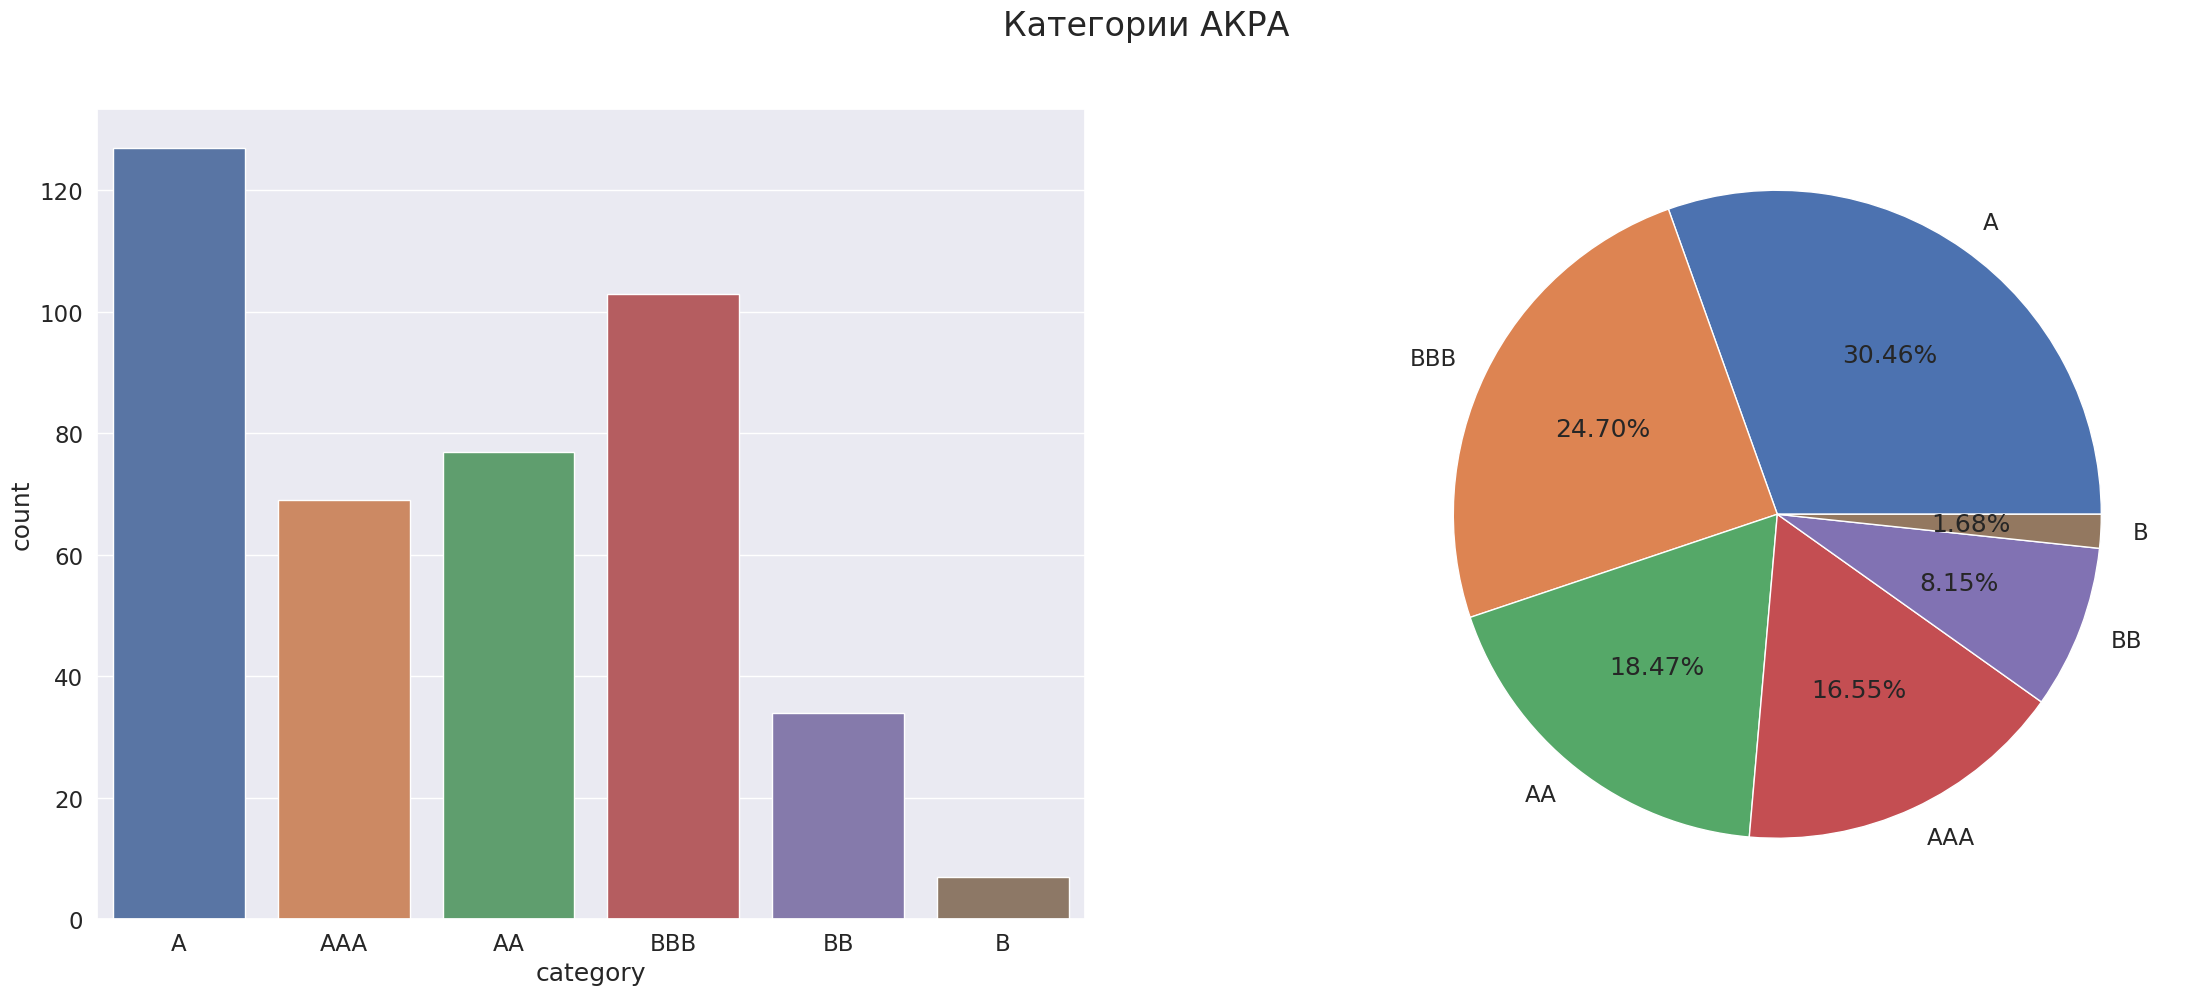

In [234]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10), dpi=100)
sns.countplot(x=akra['category'], ax=axes[0])
axes[1].pie(x=akra['category'].value_counts(),
            labels=akra['category'].value_counts().index,
            autopct='%1.2f%%',)
            #shadow=True,
            #explode=None,#(0.05, 0)
            #startangle=60)
fig.suptitle(f'Категории АКРА', fontsize=24)
plt.show()

## Classification with xgboost

In [235]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import xgboost as xgb
import catboost
import warnings
warnings.filterwarnings('ignore')

In [236]:
import nltk
# from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /home/yagor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yagor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yagor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/yagor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [237]:
stop = set(stopwords.words('russian'))

In [238]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=3, ngram_range=(1,2), stop_words=stop)

In [178]:
# Dump the file
import pickle
import joblib
# pickle.dump(tf_transformer, open("tfidf1.pkl", "wb"))
joblib.dump(tfidf, 'tfidf_vectorizer_akra_base.pkl')


# Testing phase
# tf1 = pickle.load(open("tfidf1.pkl", 'rb'))

# Create new tfidfVectorizer with old vocabulary
# tf1_new = TfidfVectorizer(analyzer='word', ngram_range=(1,2), stop_words = "english", lowercase = True,
#                           max_features = 500000, vocabulary = tf1.vocabulary_)
# X_tf1 = tf1_new.fit_transform(new_corpus)

['tfidf_vectorizer_akra_base.pkl']

In [ ]:
loaded_vectorizer = joblib.load('tfidf_vectorizer_akra_base.pkl')
tfidf2 = TfidfVectorizer(sublinear_tf=True, min_df=3, ngram_range=(1,2), stop_words=stop)
# Now you can use the loaded vectorizer to transform new data
transformed_data = loaded_vectorizer.transform(["new text sample"])

In [179]:
lime -v

NameError: name 'lime' is not defined

In [239]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [240]:
#s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
# akra['text_clean'] = akra['text'].replace(r'\(.*?\)\ *','',regex=True)
akra['text_clean'] = akra['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [241]:
features = tfidf.fit_transform(akra.text_clean).toarray()
labels = akra.category
features.shape

(417, 28799)

In [242]:
akra['category_label'] = akra["category"].apply(lambda x: category2label[x])

In [243]:
X = features
y = akra['category_label']

In [244]:
print(X.shape, y.shape)
print(y.unique())


(417, 28799) (417,)
[3 5 4 2 1 0]


In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)#

In [252]:
Y_train.unique()
Y_test.unique()

array([2, 5, 3, 1, 4, 0])

In [253]:

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f"%xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%xgb_rf_classif.score(X_train, Y_train))

Test  Accuracy Score : 0.90
Train Accuracy Score : 0.99


In [135]:
# xgb_rf_classif.save_model("multiclass_classification_acra_base.model")

In [254]:
from sklearn.metrics import f1_score

In [255]:
f1_score(Y_test, xgb_rf_classif.predict(X_test), average='weighted')

0.8930205225621185

In [256]:
from sklearn.metrics import confusion_matrix, classification_report
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, xgb_rf_classif.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, xgb_rf_classif.predict(X_test)))


Confusion Matrix : 
[[ 1  0  0  1  0  0]
 [ 0  9  0  0  0  0]
 [ 0  1 25  0  0  0]
 [ 0  0  4 26  2  0]
 [ 0  0  0  3 16  0]
 [ 0  0  0  0  0 17]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.90      1.00      0.95         9
           2       0.86      0.96      0.91        26
           3       0.87      0.81      0.84        32
           4       0.89      0.84      0.86        19
           5       1.00      1.00      1.00        17

    accuracy                           0.90       105
   macro avg       0.92      0.85      0.87       105
weighted avg       0.90      0.90      0.89       105



## Эксперт

In [259]:
expert = pd.read_csv('excpert.csv')
expert.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,2,«Эксперт РА» подтвердил кредитный рейтинг комп...,BB,BB,Эксперт РА
1,1,4,«Эксперт РА» присвоил кредитный рейтинг ПАО «Ф...,AAA,AAA,Эксперт РА
2,2,7,«Эксперт РА» повысил кредитный рейтинг ОАО «МР...,AA,AA+,Эксперт РА
3,3,8,«Эксперт РА» понизил кредитный рейтинг ПАО «М....,A,A,Эксперт РА
4,4,9,«Эксперт РА» повысил кредитный рейтинг компани...,BB,BB+,Эксперт РА


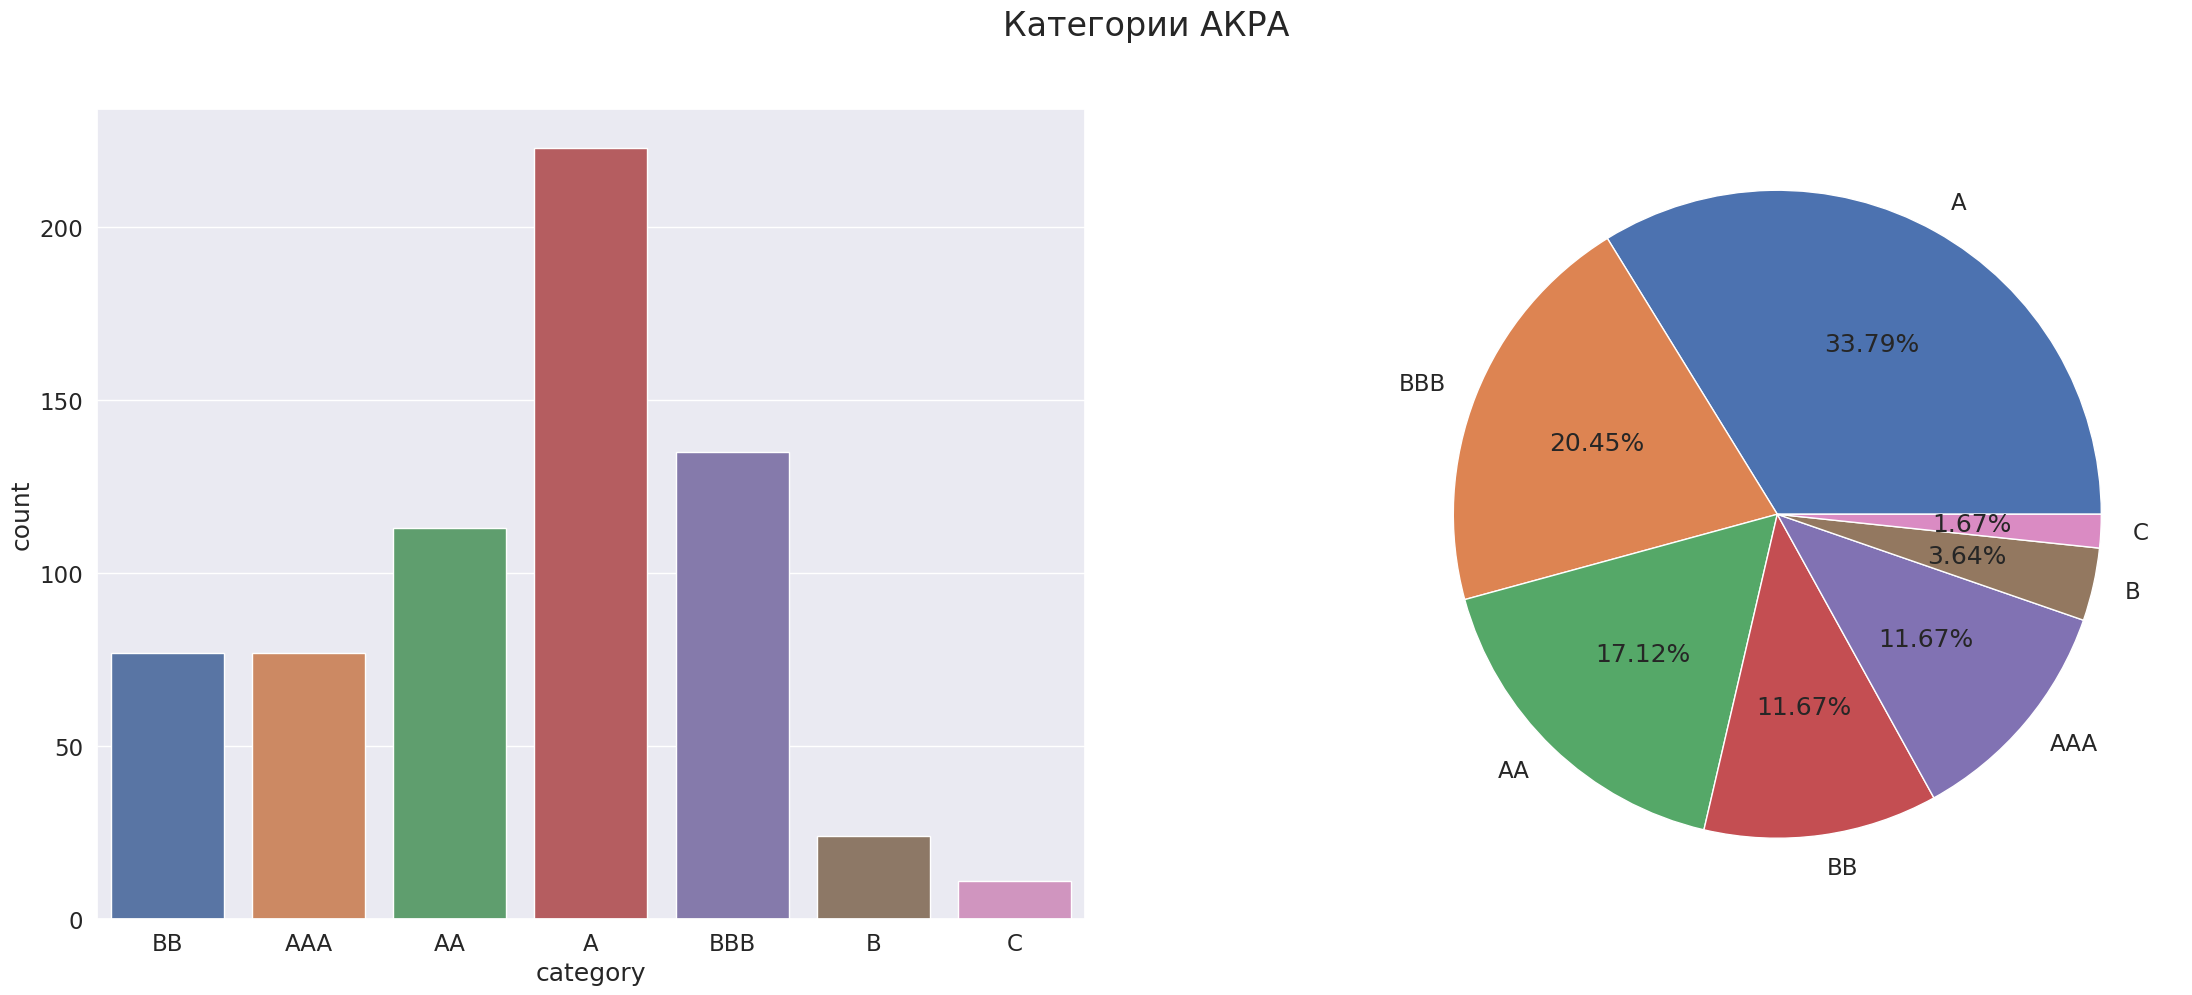

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10), dpi=100)
sns.countplot(x=expert['category'], ax=axes[0])
axes[1].pie(x=expert['category'].value_counts(),
            labels=expert['category'].value_counts().index,
            autopct='%1.2f%%',)
            #shadow=True,
            #explode=None,#(0.05, 0)
            #startangle=60)
fig.suptitle(f'Категории АКРА', fontsize=24)
plt.show()

In [261]:
reyt = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B' ,'C']

all_reyt = []
adds = ['+', "", "-"]
for i in reyt:
    if i!='C' and i!='AAA':
        for j in adds:
            all_reyt.append(i+j)
    else:
        all_reyt.append(i)
# reyt = reyt[:len(reyt)-1] # класса C нет
print(reyt)
category2label = {reyt[-i]: i-1 for i in range(len(reyt)+1)}
print(category2label, sep=" ")

['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
{'AAA': 6, 'C': 0, 'B': 1, 'BB': 2, 'BBB': 3, 'A': 4, 'AA': 5}


In [262]:
all_reyt_dict = {all_reyt[-i]: i-1 for i in range(len(all_reyt)+1)}
print(all_reyt_dict, sep=" ")

{'AAA': 16, 'C': 0, 'B-': 1, 'B': 2, 'B+': 3, 'BB-': 4, 'BB': 5, 'BB+': 6, 'BBB-': 7, 'BBB': 8, 'BBB+': 9, 'A-': 10, 'A': 11, 'A+': 12, 'AA-': 13, 'AA': 14, 'AA+': 15}


## Classification with xgboost

In [263]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import xgboost as xgb
import catboost
import warnings
warnings.filterwarnings('ignore')

In [264]:
import nltk
# from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /home/yagor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yagor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yagor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/yagor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [265]:
stop = set(stopwords.words('russian'))

In [266]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words=stop)

In [267]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [268]:
expert['text'][6]

'«Эксперт РА» присвоил кредитный рейтинг АО «Новосибирскэнергосбыт» на уровне <rating>   Москва,  10 марта 2023 г.  Рейтинговое агентство «Эксперт РА» присвоило  рейтинг кредитоспособности  нефинансовой компании   АО «Новосибирскэнергосбыт»   на уровне <rating>. Прогноз по рейтингу – стабильный.  ") АО «Новосибирскэнергосбыт»  (далее – компания) – обеспечивает энергоснабжение г. Новосибирска и  Новосибирской области и входит в десятку крупнейших энергетических сбытовых компаний  России. Основным видом деятельности Компании является покупка и реализация  электрической энергии потребителям (включая промышленные организации,  население, электросетевые компании региона), оказание комплекса услуг по разработке  энергосберегающих мероприятий.   Компания является  единственным гарантирующим поставщиком электроэнергии на территории  Новосибирской области и г. Новосибирска, занимая первое место среди  гарантирующих поставщиков в РФ с 2012-2022гг по мнению ассоциации НП Совет  рынка, по показате

In [269]:
#s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
# expert['text_clean'] = expert['text'].replace(r'\(.*?\)\ *','',regex=True)
expert['text_clean'] = expert['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [270]:
features = tfidf.fit_transform(expert.text_clean).toarray()
labels = expert.category
features.shape

(660, 22501)

In [271]:
expert['category_label'] = expert["category"].apply(lambda x: category2label[x])

In [272]:
X = features
y = expert['category_label']

In [273]:
print(X.shape, y.shape)
print(y.unique())


(660, 22501) (660,)
[2 6 5 4 3 1 0]


In [274]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)#

In [275]:
Y_train.unique()

array([3, 5, 6, 4, 2, 1, 0])

In [276]:

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f"%xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%xgb_rf_classif.score(X_train, Y_train))

Test  Accuracy Score : 0.65
Train Accuracy Score : 0.97


In [277]:
from sklearn.metrics import f1_score

In [278]:
f1_score(Y_test, xgb_rf_classif.predict(X_test), average='weighted')

0.6515130126790205

In [279]:
from sklearn.metrics import confusion_matrix, classification_report
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, xgb_rf_classif.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, xgb_rf_classif.predict(X_test)))


Confusion Matrix : 
[[ 3  0  0  0  0  0  0]
 [ 0  2  1  2  1  0  0]
 [ 0  0  8  5  5  0  1]
 [ 0  0  2 20 10  2  0]
 [ 0  0  2  8 43  3  0]
 [ 0  0  0  0 11 17  0]
 [ 0  0  1  0  2  1 15]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      0.33      0.50         6
           2       0.57      0.42      0.48        19
           3       0.57      0.59      0.58        34
           4       0.60      0.77      0.67        56
           5       0.74      0.61      0.67        28
           6       0.94      0.79      0.86        19

    accuracy                           0.65       165
   macro avg       0.77      0.64      0.68       165
weighted avg       0.67      0.65      0.65       165



In [ ]:
data_train = xgb.DMatrix(X, label=y)

#Hyperparameters
params = {
    'objective': 'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
}

#Performing cross-validation
cv_results = xgb.cv(params, data_train, num_boost_round=10, nfold=5,metrics='logloss', seed=42)

#Printing the results
print(cv_results)

### NKR

In [319]:
nkr = pd.read_csv('nkr.csv')
nkr.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,3,"НКР повысило кредитный рейтинг ООО ""ОТЭКО-Порт...",A,A,НКР
1,1,13,"НКР присвоило ООО ""АСПЭК-Домстрой"" кредитный р...",BB,BB-,НКР
2,2,14,"НКР подтвердило кредитный рейтинг ООО ""Ника-Пе...",BB,BB,НКР
3,3,21,"НКР присвоило ООО ""Брусника. Строительство и д...",A,A-,НКР
4,4,29,"НКР присвоило ОАО АФП ""Нива"" кредитный рейтинг...",BB,BB,НКР


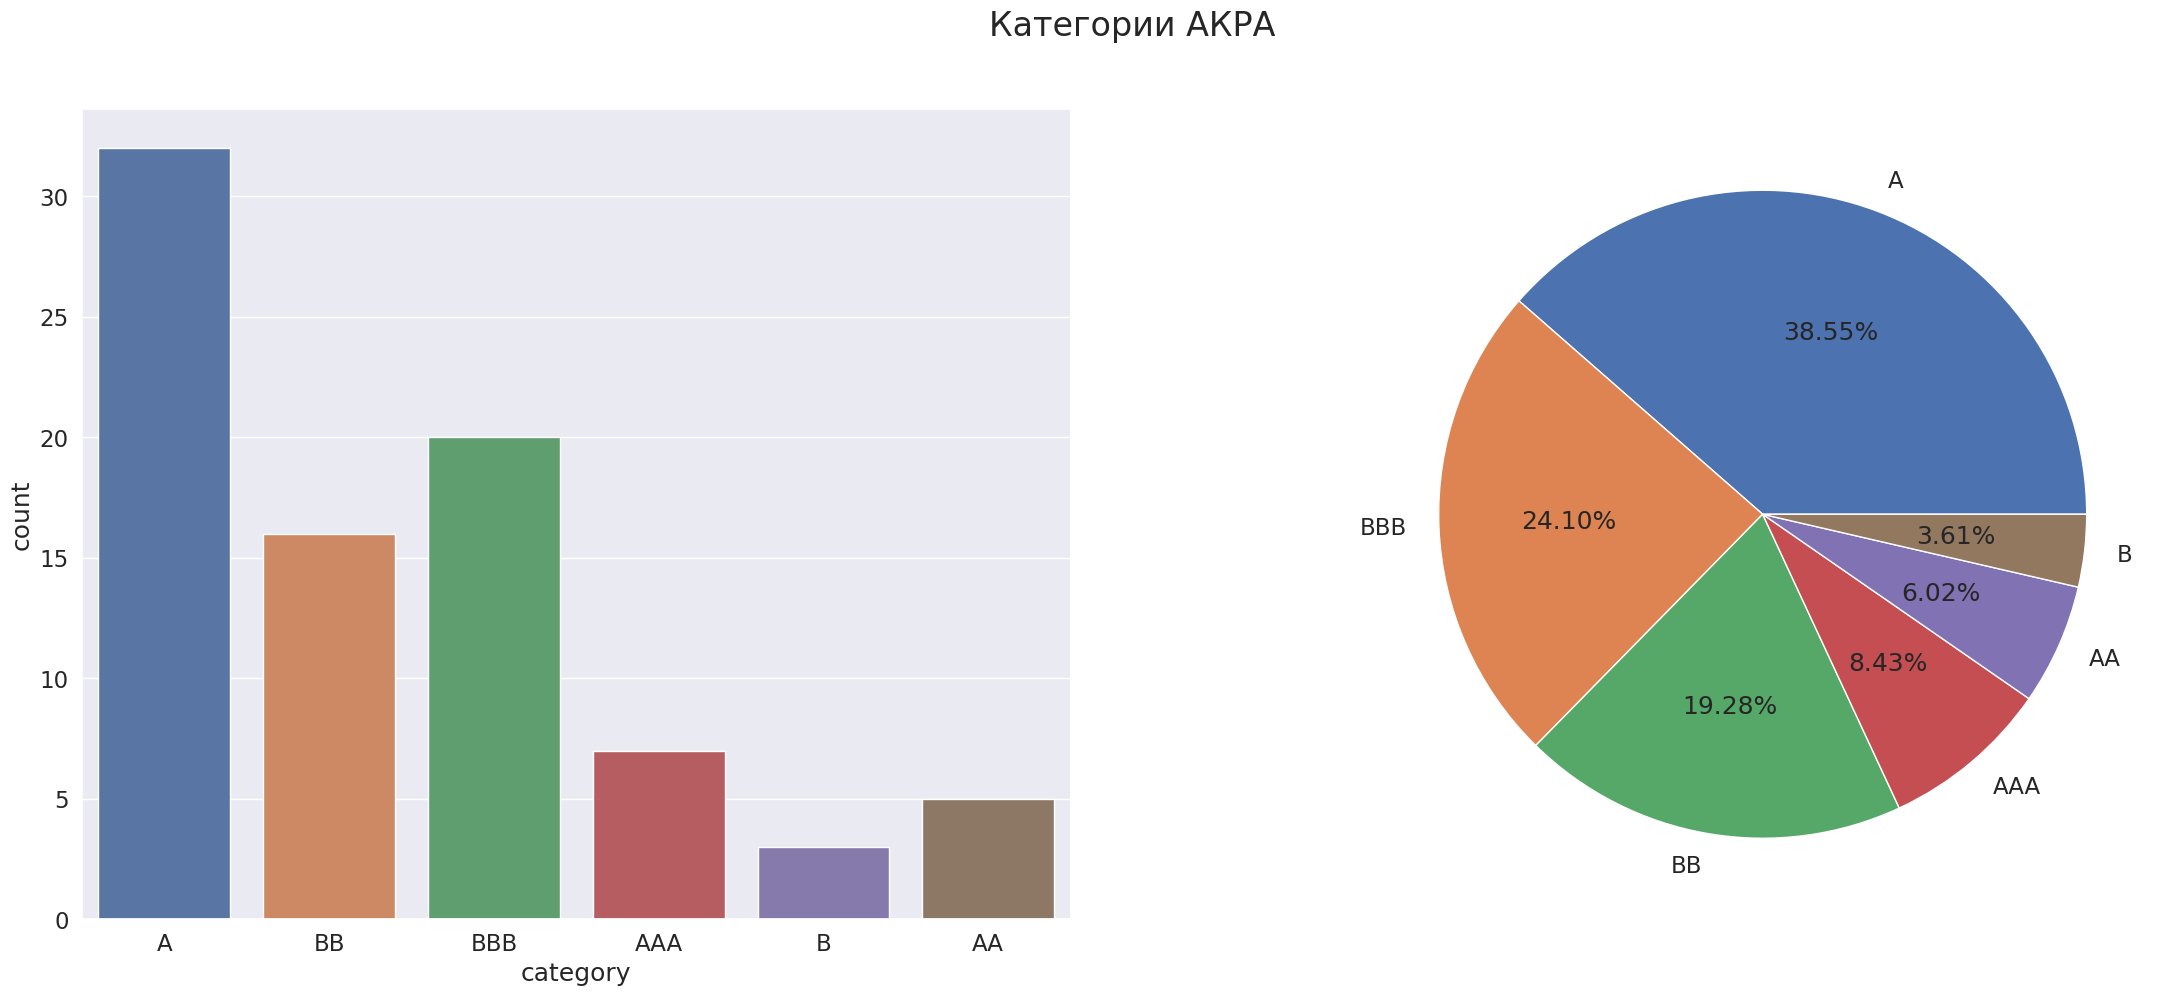

In [320]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10), dpi=100)
sns.countplot(x=nkr['category'], ax=axes[0])
axes[1].pie(x=nkr['category'].value_counts(),
            labels=nkr['category'].value_counts().index,
            autopct='%1.2f%%',)
            #shadow=True,
            #explode=None,#(0.05, 0)
            #startangle=60)
fig.suptitle(f'Категории АКРА', fontsize=24)
plt.show()

In [339]:
reyt = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B' ,'C']

all_reyt = []
adds = ['+', "", "-"]
for i in reyt:
    if i!='C' and i!='AAA':
        for j in adds:
            all_reyt.append(i+j)
    else:
        all_reyt.append(i)
reyt = reyt[:len(reyt)-1] # класса C нет
print(reyt)
category2label = {reyt[-i]: i-1 for i in range(len(reyt)+1)}
print(category2label, sep=" ")

['AAA', 'AA', 'A', 'BBB', 'BB', 'B']
{'AAA': 5, 'B': 0, 'BB': 1, 'BBB': 2, 'A': 3, 'AA': 4}


In [340]:
all_reyt_dict = {all_reyt[-i]: i-1 for i in range(len(all_reyt)+1)}
print(all_reyt_dict, sep=" ")

{'AAA': 16, 'C': 0, 'B-': 1, 'B': 2, 'B+': 3, 'BB-': 4, 'BB': 5, 'BB+': 6, 'BBB-': 7, 'BBB': 8, 'BBB+': 9, 'A-': 10, 'A': 11, 'A+': 12, 'AA-': 13, 'AA': 14, 'AA+': 15}


In [341]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [342]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words=stop)

In [343]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [ ]:
nkr['text'][6]

In [345]:
#s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
# expert['text_clean'] = expert['text'].replace(r'\(.*?\)\ *','',regex=True)
nkr['text_clean'] = nkr['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [346]:
features = tfidf.fit_transform(nkr.text_clean).toarray()
labels = nkr.category
features.shape

(83, 3841)

In [347]:
nkr['category_label'] = nkr["category"].apply(lambda x: category2label[x])

In [348]:
X = features
y = nkr['category_label']

In [349]:
print(X.shape, y.shape)
print(y.unique())


(83, 3841) (83,)
[3 1 2 5 0 4]


In [350]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)#

In [351]:
Y_train.unique()

array([1, 3, 2, 5, 4, 0])

In [352]:

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f"%xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%xgb_rf_classif.score(X_train, Y_train))

Test  Accuracy Score : 0.86
Train Accuracy Score : 0.95


In [353]:
from sklearn.metrics import f1_score

In [354]:
f1_score(Y_test, xgb_rf_classif.predict(X_test), average='weighted')

0.8378684807256236

In [355]:
from sklearn.metrics import confusion_matrix, classification_report
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, xgb_rf_classif.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, xgb_rf_classif.predict(X_test)))


Confusion Matrix : 
[[0 0 0 1 0 0]
 [0 3 1 0 0 0]
 [0 0 5 0 0 0]
 [0 0 1 7 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.75      0.86         4
           2       0.71      1.00      0.83         5
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           0.86        21
   macro avg       0.76      0.77      0.76        21
weighted avg       0.84      0.86      0.84        21



### NRA

In [367]:
nra = pd.read_csv('nra.csv')
nra.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,5,29 марта 2023 г. Ведущий рейтинговый аналитик ...,BBB,BBB,НРА
1,1,31,14 февраля 2023 г. Ведущий рейтинговый аналити...,B,B,НРА
2,2,57,16 января 2023 г. Ведущий рейтинговый аналитик...,BB,BB-,НРА
3,3,86,21 декабря 2022 г. Ведущий рейтинговый аналити...,B,B-,НРА
4,4,127,29 ноября 2022 г. Ведущий рейтинговый аналитик...,AA,AA-,НРА


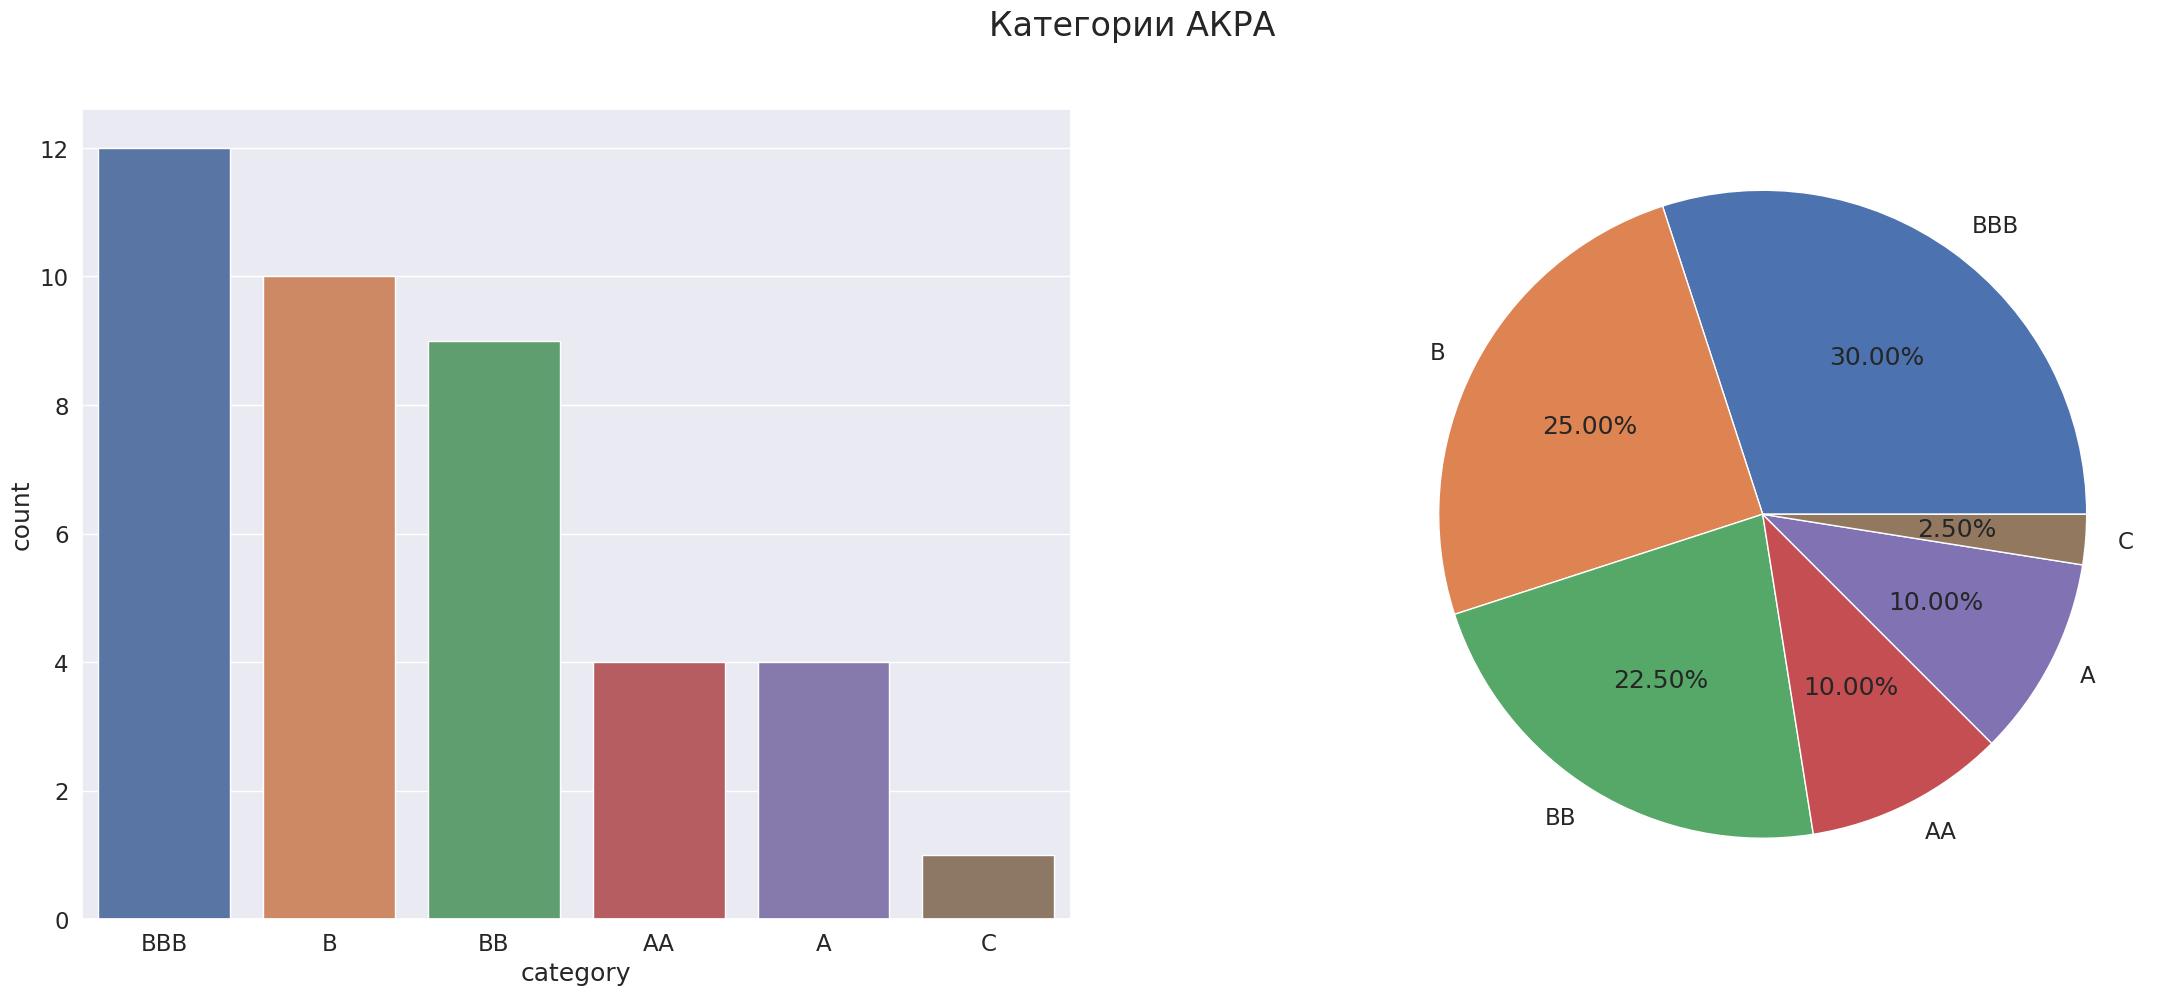

In [368]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10), dpi=100)
sns.countplot(x=nra['category'], ax=axes[0])
axes[1].pie(x=nra['category'].value_counts(),
            labels=nra['category'].value_counts().index,
            autopct='%1.2f%%',)
            #shadow=True,
            #explode=None,#(0.05, 0)
            #startangle=60)
fig.suptitle(f'Категории АКРА', fontsize=24)
plt.show()

In [369]:
reyt = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B' ,'C']

all_reyt = []
adds = ['+', "", "-"]
for i in reyt:
    if i!='C' and i!='AAA':
        for j in adds:
            all_reyt.append(i+j)
    else:
        all_reyt.append(i)
#reyt = reyt[:len(reyt)-1] # класса C нет
print(reyt)
category2label = {reyt[-i]: i-1 for i in range(len(reyt)+1)}
print(category2label, sep=" ")

['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
{'AAA': 6, 'C': 0, 'B': 1, 'BB': 2, 'BBB': 3, 'A': 4, 'AA': 5}


In [370]:
all_reyt_dict = {all_reyt[-i]: i-1 for i in range(len(all_reyt)+1)}
print(all_reyt_dict, sep=" ")

{'AAA': 16, 'C': 0, 'B-': 1, 'B': 2, 'B+': 3, 'BB-': 4, 'BB': 5, 'BB+': 6, 'BBB-': 7, 'BBB': 8, 'BBB+': 9, 'A-': 10, 'A': 11, 'A+': 12, 'AA-': 13, 'AA': 14, 'AA+': 15}


In [371]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [372]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words=stop)

In [373]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [374]:
nra['text'][6]

'НРА подтвердило кредитный рейтинг ПАО «ИНГРАД» на уровне «<rating>» по национальной рейтинговой шкале для Российской Федерации, прогноз «Стабильный» \xa0 31 октября 2022 г. Первый рейтинговый аналитик Письменный Станислав Директор корпоративных рейтингов +7 (495) 122-22-55 (125) pismenniy@ra-national.ru \xa0 Второй рейтинговый аналитик Юрова Алла Младший директор корпоративных рейтингов +7 (495) 122-22-55 (109) yurova@ra-national.ru \xa0 \xa0 Дата Рейтингового комитета 27.10.2022 г. \xa0 ПОДТВЕРЖДЕН КРЕДИТНЫЙ РЕЙТИНГ Общество с ограниченной ответственностью «Национальное Рейтинговое Агентство» (далее – НРА, Агентство) подтвердило кредитный рейтинг ПАО «ИНГРАД» на уровне «<rating>» по национальной рейтинговой шкале для Российской Федерации, прогноз «Стабильный». ПРОГНОЗ\xa0Стабильный прогноз предполагает сохранение текущего уровня рейтинга в течение следующих 12 (Двенадцати) месяцев. \xa0РЕЗЮМЕ Кредитный рейтинг (далее – Рейтинг) ПАО «ИНГРАД» (далее – Компания) на уровне «<rating>» обу

In [375]:
#s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
# expert['text_clean'] = expert['text'].replace(r'\(.*?\)\ *','',regex=True)
nra['text_clean'] = nra['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [376]:
features = tfidf.fit_transform(nra.text_clean).toarray()
labels = nra.category
features.shape

(40, 1798)

In [377]:
nra['category_label'] = nra["category"].apply(lambda x: category2label[x])

In [378]:
X = features
y = nra['category_label']

In [379]:
print(X.shape, y.shape)
print(y.unique())


(40, 1798) (40,)
[3 1 2 5 4 0]


In [382]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                          random_state=42,
                                                          test_size=0.1,
                                                          stratify=y)#

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
Y_train.unique()

array([1, 3, 2, 5, 4, 0])

In [ ]:

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f"%xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%xgb_rf_classif.score(X_train, Y_train))

Test  Accuracy Score : 0.86
Train Accuracy Score : 0.95


In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(Y_test, xgb_rf_classif.predict(X_test), average='weighted')

0.8378684807256236

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, xgb_rf_classif.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, xgb_rf_classif.predict(X_test)))


Confusion Matrix : 
[[0 0 0 1 0 0]
 [0 3 1 0 0 0]
 [0 0 5 0 0 0]
 [0 0 1 7 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 2]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.75      0.86         4
           2       0.71      1.00      0.83         5
           3       0.88      0.88      0.88         8
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           0.86        21
   macro avg       0.76      0.77      0.76        21
weighted avg       0.84      0.86      0.84        21



## ALL data

In [284]:
akra = pd.read_csv('AKRA.csv')
akra.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,1,Повышение кредитного рейтинга Акционерного об...,A,A,АКРА
1,1,6,Кредитный рейтинг ПАО «ФосАгро» (далее — Комп...,AAA,AAA,АКРА
2,2,10,Кредитный рейтинг ООО «МВМ» (далее — Компани...,A,A,АКРА
3,3,15,Кредитный рейтинг Акционерного общества «Сина...,A,A,АКРА
4,4,16,Кредитный рейтинг ПАО «М.видео» (далее — Груп...,A,A,АКРА


In [285]:
excpert = pd.read_csv('excpert.csv')
excpert.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,2,«Эксперт РА» подтвердил кредитный рейтинг комп...,BB,BB,Эксперт РА
1,1,4,«Эксперт РА» присвоил кредитный рейтинг ПАО «Ф...,AAA,AAA,Эксперт РА
2,2,7,«Эксперт РА» повысил кредитный рейтинг ОАО «МР...,AA,AA+,Эксперт РА
3,3,8,«Эксперт РА» понизил кредитный рейтинг ПАО «М....,A,A,Эксперт РА
4,4,9,«Эксперт РА» повысил кредитный рейтинг компани...,BB,BB+,Эксперт РА


In [286]:
nkr = pd.read_csv('nkr.csv')
nkr.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,3,"НКР повысило кредитный рейтинг ООО ""ОТЭКО-Порт...",A,A,НКР
1,1,13,"НКР присвоило ООО ""АСПЭК-Домстрой"" кредитный р...",BB,BB-,НКР
2,2,14,"НКР подтвердило кредитный рейтинг ООО ""Ника-Пе...",BB,BB,НКР
3,3,21,"НКР присвоило ООО ""Брусника. Строительство и д...",A,A-,НКР
4,4,29,"НКР присвоило ОАО АФП ""Нива"" кредитный рейтинг...",BB,BB,НКР


In [287]:
nra = pd.read_csv('nra.csv')
nra.head()

,Unnamed: 0,Id,text,category,lvl,agent
0,0,5,29 марта 2023 г. Ведущий рейтинговый аналитик ...,BBB,BBB,НРА
1,1,31,14 февраля 2023 г. Ведущий рейтинговый аналити...,B,B,НРА
2,2,57,16 января 2023 г. Ведущий рейтинговый аналитик...,BB,BB-,НРА
3,3,86,21 декабря 2022 г. Ведущий рейтинговый аналити...,B,B-,НРА
4,4,127,29 ноября 2022 г. Ведущий рейтинговый аналитик...,AA,AA-,НРА


In [288]:
all_df = pd.concat([akra, excpert, nkr, nra], ignore_index=True)
all_df

,Unnamed: 0,Id,text,category,lvl,agent
0,0,1,Повышение кредитного рейтинга Акционерного об...,A,A,АКРА
1,1,6,Кредитный рейтинг ПАО «ФосАгро» (далее — Комп...,AAA,AAA,АКРА
2,2,10,Кредитный рейтинг ООО «МВМ» (далее — Компани...,A,A,АКРА
3,3,15,Кредитный рейтинг Акционерного общества «Сина...,A,A,АКРА
4,4,16,Кредитный рейтинг ПАО «М.видео» (далее — Груп...,A,A,АКРА
...,...,...,...,...,...,...
1195,35,758,НРА присвоило кредитный рейтинг ООО НПО «ХимТэ...,BBB,BBB,НРА
1196,36,791,20 февраля 2021 г. Ведущий рейтинговый аналити...,BB,BB,НРА
1197,37,840,Ведущий рейтинговый аналитик Юрова Алла Аналит...,A,A+,НРА
1198,38,862,30ноября 2020 г. Ведущий рейтинговый аналитик ...,A,A-,НРА


In [289]:
# all_df.to_csv('all_data.csv')

In [291]:
reyt = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B' ,'C']

all_reyt = []
adds = ['+', "", "-"]
for i in reyt:
    if i!='C' and i!='AAA':
        for j in adds:
            all_reyt.append(i+j)
    else:
        all_reyt.append(i)
# reyt = reyt[:len(reyt)-1] # класса C нет
print(reyt)
category2label = {reyt[-i]: i-1 for i in range(len(reyt)+1)}
print(category2label, sep=" ")

['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C']
{'AAA': 6, 'C': 0, 'B': 1, 'BB': 2, 'BBB': 3, 'A': 4, 'AA': 5}


In [292]:
all_reyt_dict = {all_reyt[-i]: i-1 for i in range(len(all_reyt)+1)}
print(all_reyt_dict, sep=" ")

{'AAA': 16, 'C': 0, 'B-': 1, 'B': 2, 'B+': 3, 'BB-': 4, 'BB': 5, 'BB+': 6, 'BBB-': 7, 'BBB': 8, 'BBB+': 9, 'A-': 10, 'A': 11, 'A+': 12, 'AA-': 13, 'AA': 14, 'AA+': 15}


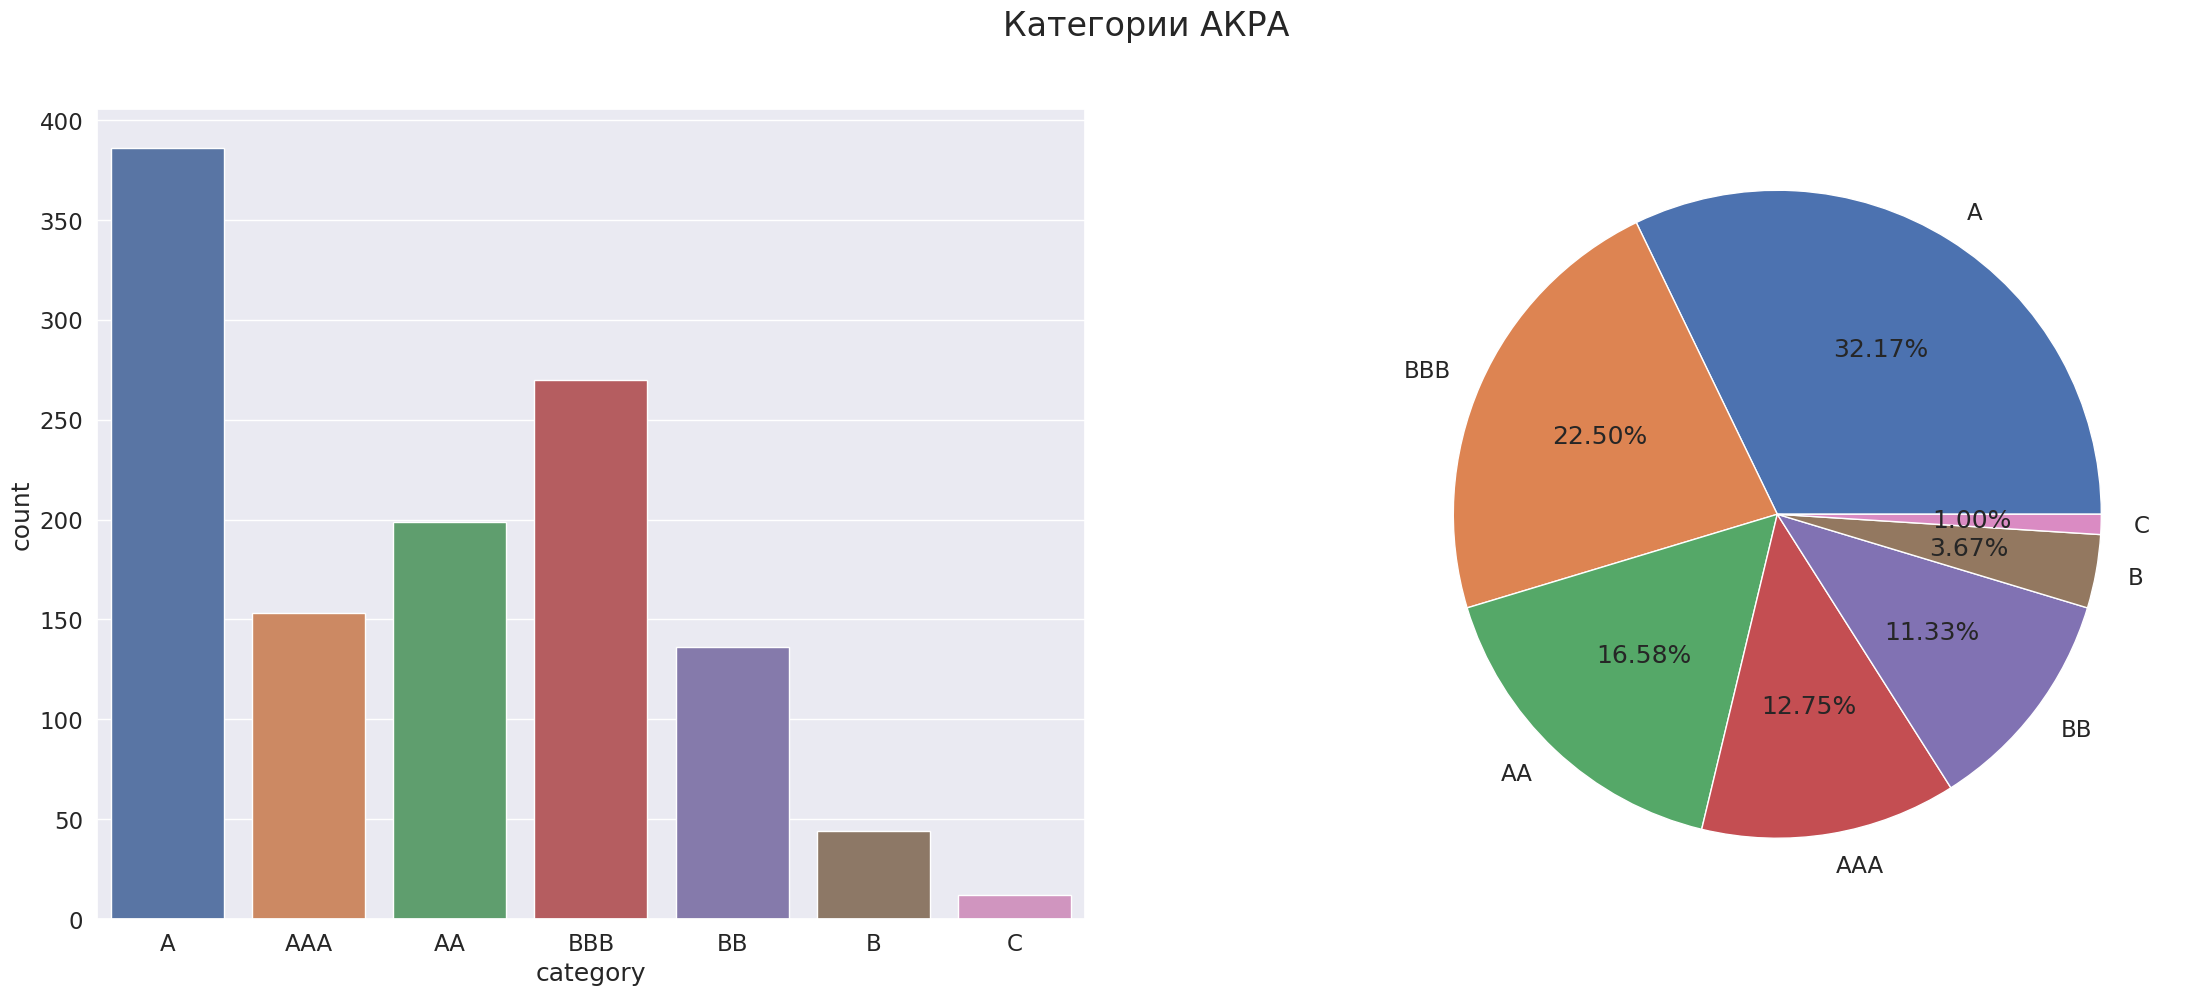

In [293]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(25, 10), dpi=100)
sns.countplot(x=all_df['category'], ax=axes[0])
axes[1].pie(x=all_df['category'].value_counts(),
            labels=all_df['category'].value_counts().index,
            autopct='%1.2f%%',)
            #shadow=True,
            #explode=None,#(0.05, 0)
            #startangle=60)
fig.suptitle(f'Категории АКРА', fontsize=24)
plt.show()

## Classification with xgboost

In [294]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn import metrics
import xgboost as xgb
import catboost
import warnings
warnings.filterwarnings('ignore')

In [295]:
import nltk
# from nltk.corpus import stopwords
# russian_stopwords = stopwords.words("russian")
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package stopwords to /home/yagor/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/yagor/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/yagor/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /home/yagor/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [296]:
stop = set(stopwords.words('russian'))

In [301]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, ngram_range=(1,2), stop_words=stop)

In [302]:
import random
plt.style.use('fivethirtyeight')
sns.set(font_scale=1.5)
pd.options.display.max_columns = 250
pd.options.display.max_rows = 250
warnings.filterwarnings('ignore')


#Setting seeds for consistent results.
seed_val = 42
random.seed(seed_val)
np.random.seed(seed_val)

In [303]:
#s = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", s)
# akra['text_clean'] = akra['text'].replace(r'\(.*?\)\ *','',regex=True)
all_df['text_clean'] = all_df['text'].replace(r'[^\w\s]',' ',regex=True).replace(r'\s+',' ',regex=True).str.lower()

In [304]:
features = tfidf.fit_transform(all_df.text_clean).toarray()
labels = all_df.category
features.shape

(1200, 37596)

In [308]:
all_df['category_label'] = all_df["category"].apply(lambda x: category2label[x])

In [309]:
X = features
y = all_df['category_label']

In [310]:
print(X.shape, y.shape)
print(y.unique())


(1200, 37596) (1200,)
[4 6 5 3 2 1 0]


In [311]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)#

In [312]:
Y_train.unique()
Y_test.unique()

array([6, 2, 4, 5, 3, 0, 1])

In [313]:

xgb_rf_classif = xgb.XGBRFClassifier()

xgb_rf_classif.fit(X_train, Y_train)

print("Test  Accuracy Score : %.2f"%xgb_rf_classif.score(X_test, Y_test))
print("Train Accuracy Score : %.2f"%xgb_rf_classif.score(X_train, Y_train))

Test  Accuracy Score : 0.67
Train Accuracy Score : 0.90


In [314]:
from sklearn.metrics import f1_score

In [315]:
f1_score(Y_test, xgb_rf_classif.predict(X_test), average='weighted')

0.6712810376240327

In [316]:
from sklearn.metrics import confusion_matrix, classification_report
print()
print("Confusion Matrix : ")
print(confusion_matrix(Y_test, xgb_rf_classif.predict(X_test)))
print()
print("Classification Report")
print(classification_report(Y_test, xgb_rf_classif.predict(X_test)))


Confusion Matrix : 
[[ 2  0  0  0  1  0  0]
 [ 0  4  3  0  4  0  0]
 [ 0  0 22  2 10  0  0]
 [ 0  1  3 37 26  1  0]
 [ 0  0  2  3 86  2  3]
 [ 0  1  1  2 20 26  0]
 [ 0  1  0  0 10  2 25]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.57      0.36      0.44        11
           2       0.71      0.65      0.68        34
           3       0.84      0.54      0.66        68
           4       0.55      0.90      0.68        96
           5       0.84      0.52      0.64        50
           6       0.89      0.66      0.76        38

    accuracy                           0.67       300
   macro avg       0.77      0.61      0.67       300
weighted avg       0.73      0.67      0.67       300



## parameter tuning

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

## 

## Interpret with LIME

In [136]:
reyt

['AAA', 'AA', 'A', 'BBB', 'BB', 'B']

In [138]:
from lime import lime_text

explainer = lime_text.LimeTextExplainer(class_names=[reyt])
explainer

In [141]:
text_train, text_test, y_train, y_test = train_test_split(akra['text_clean'], y,
                                                          random_state=42,
                                                          test_size=0.25,
                                                          stratify=y)

In [142]:
def pred_fn(text):
    text_transformed = tfidf.transform(text)
    return xgb_rf_classif.predict_proba(text_transformed)


In [145]:
idx = random.randint(1, len(text_test))

print("Actual Text : ", text_test[idx])

# print("Prediction : ", xgb_rf_classif.predict(X_test[idx].reshape(1,-1))[0])
# print("Actual :     ", y_test[idx])

# explanation = explainer.explain_instance(text_test[idx], classifier_fn=pred_fn)

# explanation.show_in_notebook()

Actual Text :  кредитный рейтинг пао м видео далее группа м видео эльдорадо компания группа обусловлен сильной рыночной позицией высокой оценкой бизнес профиля которая в свою очередь определяется существенной долей онлайн продаж и тем что сеть группы м видео эльдорадо сформирована из магазинов разных форматов и является частью логистической инфраструктуры для интернет заказов а также высокой узнаваемостью брендов м видео и эльдорадо понижение кредитного рейтинга связано с ростом долговой нагрузки и снижением показателей покрытия процентных и фиксированных платежей в 2022 году на фоне санкций компания была вынуждена оперативно перестраивать процессы закупки и доставки товаров а также дополнительно финансировать оборотный капитал необходимый для закупки товаров за рубежом группа м видео эльдорадо была образована после приобретения дочерней компанией пао м видео розничных сетей ооо эльдорадо и ооо медиа сатурн руссланд российский бизнес mediamarktsaturn в 2018 году группа является ведущим

In [148]:
print("Prediction : ", xgb_rf_classif.predict(X_test[idx].reshape(1,-1))[0])
print("Actual :     ", y_test[idx])

explanation = explainer.explain_instance(text_test[idx], classifier_fn=pred_fn)

# explanation.show_in_notebook()

Prediction :  2
Actual :      3


TypeError: solve() got an unexpected keyword argument 'sym_pos'

In [140]:
idx = random.randint(1, len(X_test))

print("Actual Text : ", akra['text_clean'][idx])

print("Prediction : ", xgb_rf_classif.predict(features.reshape(1,-1))[0])
print("Actual :     ", labels[idx])

explanation = explainer.explain_instance(akra['text_clean'][idx], classifier_fn=pred_fn)

explanation.show_in_notebook()

Actual Text :  кредитный рейтинг ао мхк еврохим далее ао мхк еврохим компания обусловлен сильным бизнес профилем очень сильной географической диверсификацией очень высоким уровнем корпоративного управления очень крупным размером компании очень высокими показателями рентабельности покрытия и ликвидности а также низкой долговой нагрузкой и высокой оценкой денежного потока ао мхк еврохим основное производственное подразделение группы еврохим далее группа группа еврохим еврохим учитывая что на долю компании приходится основная часть активов и денежного потока группы еврохим при оценке кредитоспособности компании акра использовало консолидированные показатели группы группа еврохим входит в четверку крупнейших мировых производителей удобрений группа выпускает азотные фосфатные калийные и комплексные удобрения а также оперирует в сегменте поставок железорудного концентрата и продуктов органического синтеза ключевые факторы оценки прогноз на 2022 год энергетический кризис и санкционное давлени

ValueError: Feature shape mismatch, expected: 28799, got 12009183